<a href="https://colab.research.google.com/github/GarapatiVidyaSri/Online_payment_fraud_detection-using-ML/blob/main/Online_Payment_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Payment Fraud Detection Model**

**Importing** **libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Dataset**

In [ ]:
df=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv");
df.shape

(3357972, 11)

**Visualising the Data**

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3357967,254,CASH_OUT,116989.36,C1208961790,28314.00,0.00,C1768918040,32782.78,149772.14,0.0,0.0
3357968,254,CASH_OUT,48120.47,C1417320099,168792.00,120671.53,C2064109838,0.00,48120.47,0.0,0.0
3357969,254,CASH_IN,303485.14,C1684604365,21529.00,325014.14,C1164565361,0.00,0.00,0.0,0.0
3357970,254,PAYMENT,298.18,C426959681,325014.14,324715.97,M722997803,0.00,0.00,0.0,0.0
3357971,254,CASH_IN,1173.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357972 entries, 0 to 3357971
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 281.8+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.357972e+06,3.357972e+06,3.357971e+06,3.357971e+06,3.357971e+06,3.357971e+06,3.357971e+06,3.357971e+06
mean,1.368491e+02,1.583067e+05,8.428322e+05,8.643852e+05,9.953465e+05,1.101305e+06,8.525982e-04,5.955978e-07
std,8.087860e+01,2.694799e+05,2.911411e+06,2.947768e+06,2.302547e+06,2.383308e+06,2.918684e-02,7.717497e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.100000e+01,1.276010e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.590000e+02,7.628911e+04,1.451800e+04,0.000000e+00,1.375947e+05,2.237297e+05,0.000000e+00,0.000000e+00
75%,2.050000e+02,2.116249e+05,1.122696e+05,1.519753e+05,9.436189e+05,1.126130e+06,0.000000e+00,0.000000e+00
max,2.540000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.285430e+07,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C2064109838',
       'M722997803', nan], dtype=object)

In [ ]:
df.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1684604365',
       'C426959681', nan], dtype=object)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.nameDest.value_counts()

nameDest
C1286084959    104
C985934102     103
C665576141     100
C248609774      95
C1590550415     94
              ... 
M119756806       1
M1323137297      1
M853355326       1
M1551021059      1
M722997803       1
Name: count, Length: 1430080, dtype: int64

In [ ]:
df["type"].value_counts()

type
CASH_OUT    1194335
PAYMENT     1128006
CASH_IN      736969
TRANSFER     277738
DEBIT         20923
Name: count, dtype: int64

<Axes: title={'center': 'visualizing missing values in the dataset'}>

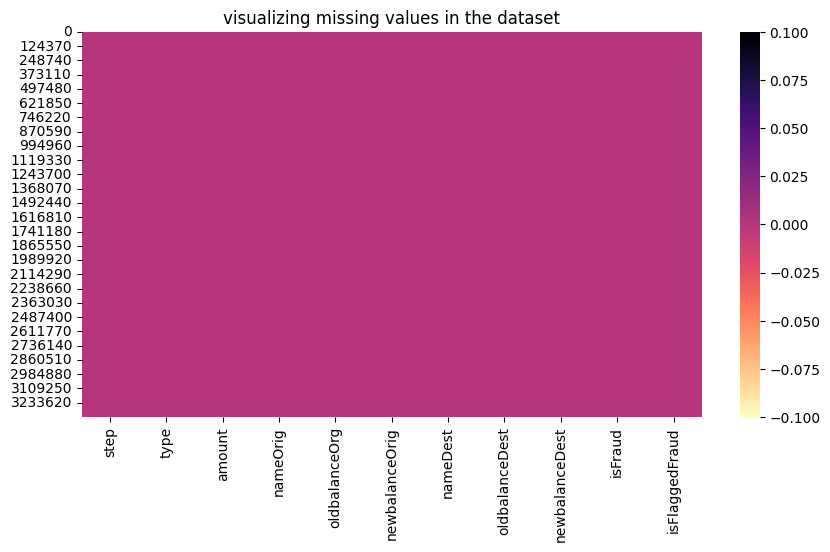

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("visualizing missing values in the dataset")
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r")

In [ ]:
df['amount'].mean()

158306.7576595838

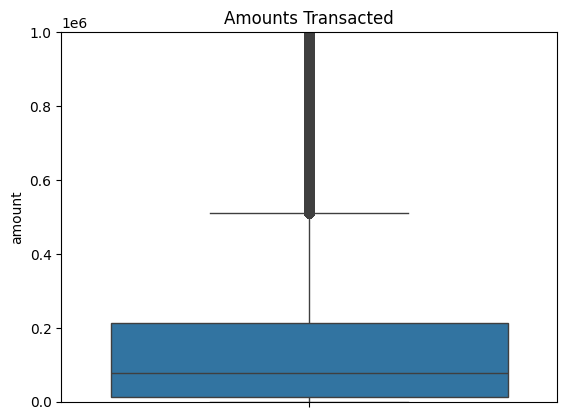

In [ ]:

sns.boxplot(y=df.amount)
plt.title('Amounts Transacted')
plt.ylim(0,1000000)
plt.show()

In [ ]:
type = df.type.value_counts()
transaction = type.index
quantity = type.values

# draw pie circule with plotly
import plotly.express as px
figure = px.pie(df,
               values = quantity,
               names = transaction,
               hole = .5,
               title = 'Distribution of Transaction Type')
figure.show()

In [ ]:
# Removing the unnecessary features for model building and training.
df.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:

df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

<Axes: >

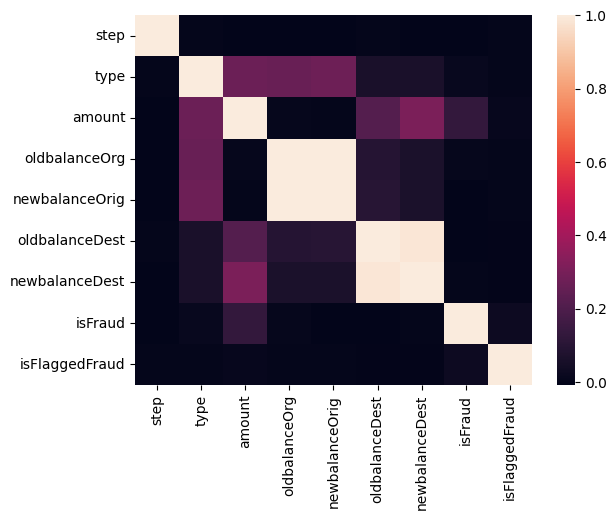

In [ ]:
from seaborn import heatmap
heatmap(df.corr())

In [ ]:
correlation = df.corr()
print(correlation['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.126694
isFlaggedFraud    0.026419
type              0.013184
oldbalanceOrg     0.005617
newbalanceDest    0.000648
step             -0.004197
oldbalanceDest   -0.006552
newbalanceOrig   -0.007761
Name: isFraud, dtype: float64


In [ ]:

Fraudulent_Transaction = df[df.isFraud ==1]
Not_Fraudulent_Transaction = df[df.isFraud ==0]

print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))

Fraudulent Transaction: 2863
Not Fraudulent Transaction: 3355108


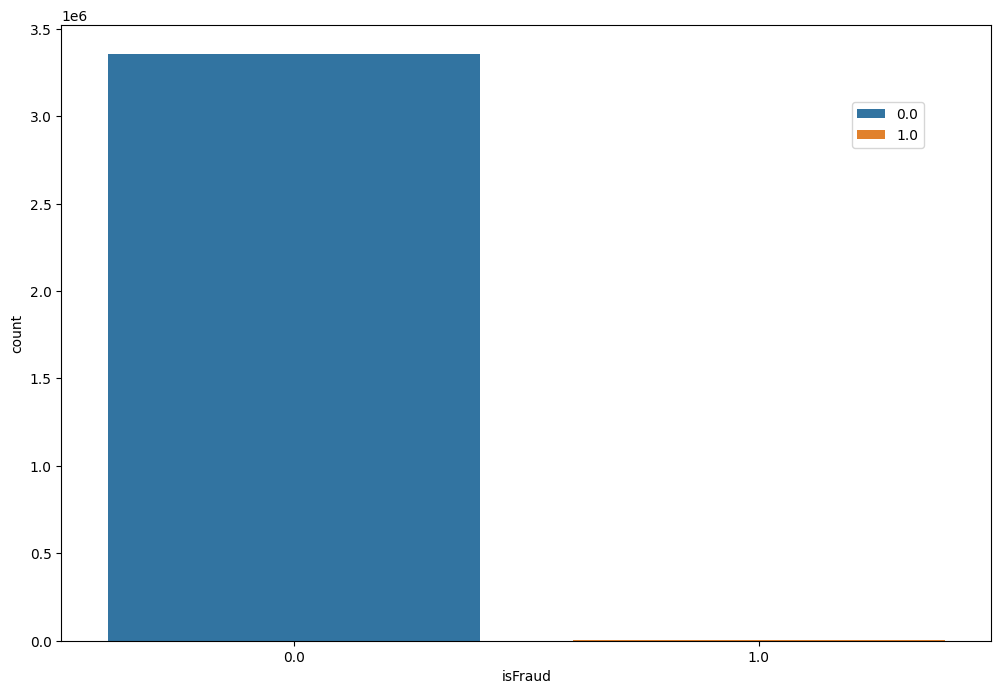

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=df,hue='isFraud')
plt.legend(loc=[0.85,0.8])

**Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Y = df['isFraud']
features = df.drop('isFraud', axis=1)
X=features
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=2863)

In [ ]:
Final_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)
Final_dataset['isFraud'].value_counts()

isFraud
0.0    2863
1.0    2863
Name: count, dtype: int64

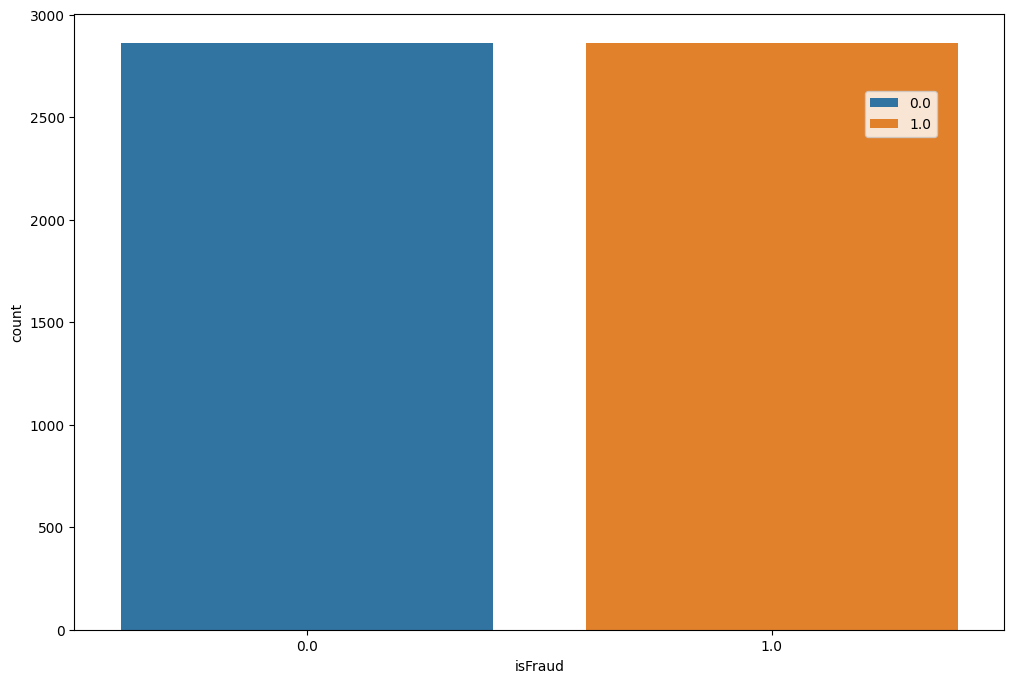

In [ ]:
# Checkin the target variable after Sampling

plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=Final_dataset,hue='isFraud')
plt.legend(loc=[0.85,0.8])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)
#perform one-hot encoding on 'type' column
encoder_df =  pd.get_dummies(Final_dataset, columns=['type'], prefix=['type'])
encoder_df


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
1315219,136,22591.66,150082.00,127490.34,0.00,0.00,0.0,0.0,False,True,False,False,False
2799528,217,1754.42,159947.00,158192.58,1042401.02,1044155.43,0.0,0.0,False,False,False,False,True
2165561,184,22629.04,312655.01,290025.97,0.00,0.00,0.0,0.0,False,True,False,False,False
568948,23,251670.02,0.00,0.00,1087801.36,1339471.38,0.0,0.0,False,False,False,True,False
2815016,225,544396.42,133128.94,677525.36,1147945.79,603549.37,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339186,253,168622.30,168622.30,0.00,941451.87,1110074.16,1.0,0.0,True,False,False,False,False
3340741,253,168455.76,168455.76,0.00,0.00,0.00,1.0,0.0,False,False,False,True,False
3340742,253,168455.76,168455.76,0.00,468448.82,636904.58,1.0,0.0,True,False,False,False,False
3343333,253,2415826.18,2415826.18,0.00,0.00,0.00,1.0,0.0,False,False,False,True,False


**logistic regression**

In [ ]:
Y= encoder_df['isFraud']
features = encoder_df.drop('isFraud', axis=1)
X = features
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model_pred = model.predict(X_test)
probs = model.predict_proba(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score,roc_auc_score


In [ ]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       573
         1.0       0.97      0.92      0.94       573

    accuracy                           0.95      1146
   macro avg       0.95      0.95      0.94      1146
weighted avg       0.95      0.95      0.94      1146



In [ ]:
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),557,16
Actually Positive(1),47,526


In [ ]:
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),557,16
Actually Fraud(1),47,526


In [ ]:
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9450261780104712


In [ ]:
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9318888738625606

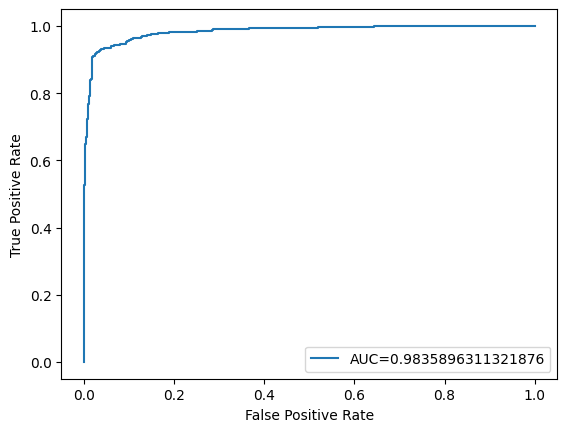

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)



plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9835896311321876


**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_recall_curve,classification_report,average_precision_score


In [ ]:
print('Classification_Report:\n',classification_report(Y_test, Y_pred))

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       573
         1.0       0.99      0.99      0.99       573

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
pd.DataFrame(confusion_matrix(Y_test, Y_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),566,7
Actually Positive(1),6,567


In [ ]:
pd.DataFrame(confusion_matrix(Y_test, Y_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),566,7
Actually Positive(1),6,567


In [ ]:
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Accuracy: 0.9886561954624782


In [ ]:
average_precision = average_precision_score(Y_test, Y_pred)
average_precision

0.9826969735665942

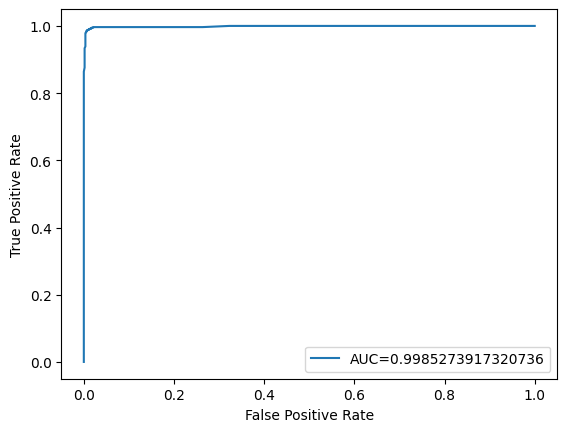

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
probs = model.predict_proba(X_test)

In [ ]:
probs

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [ ]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9985273917320736


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
print('Classification_Report:\n',classification_report(Y_test, Y_pred))

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       573
         1.0       0.99      0.99      0.99       573

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
pd.DataFrame(confusion_matrix(Y_test, Y_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),568,5
Actually Positive(1),5,568


In [ ]:
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Accuracy: 0.9912739965095986


In [ ]:
average_precision = average_precision_score(Y_test, Y_pred)
average_precision

0.9869871379013124

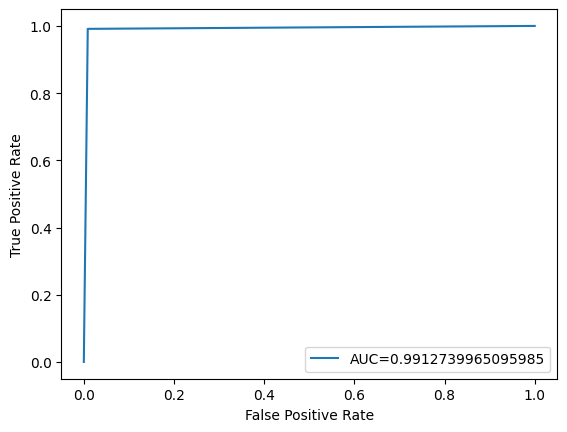

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9985273917320736


In [ ]:
# Analyse the accuracy of the model
accuracy = model.score(X_test, Y_test)
accuracy

0.9912739965095986

In [ ]:
input_data = (252, 23086.74,	61267.0	,84353.74	,3140935.22	,3117848.48	,0,0,0,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('payment is not fraud')
else:
  print('payment is fraud')


[0.]
payment is not fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
import pickle

In [ ]:
filename = 'online_fraud_detection_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('online_fraud_detection_model.sav', 'rb'))

In [ ]:
input_data = (252, 23086.74,	61267.0	,84353.74	,3140935.22	,3117848.48	,0,0,0,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('payment is not fraud')
else:
  print('payment is fraud')

[0.]
payment is not fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
for column in X.columns:
  print(column)

step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFlaggedFraud
type_1
type_2
type_3
type_4
type_5
